In [153]:
# Import numpy
import numpy as np

# Importing plotting stuff
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting style defaults
import seaborn as sns; sns.set()

# Import Astropy things we need
from astropy.io import ascii

import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table

#Import Pandas
import pandas as pd

# Importing Principal Component Analysis
from sklearn.decomposition import PCA

In [154]:
# Query OGLE-III database for Type II Cepheids: http://ogledb.astrouw.edu.pl/~ogle/CVS/
data = ascii.read('AllTypeIICepheidsinOGLE.txt') # All of the Type II Cepheids in the OGLE Survey

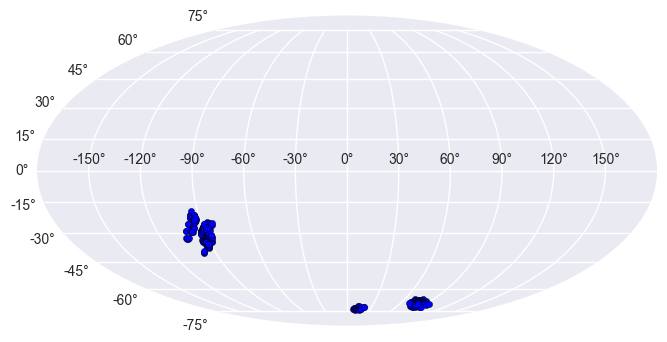

In [155]:
# Getting all Type II Cepheids coordinates in OGLE
ra = coord.Angle(data['RA'], unit=u.hour)
ra.degree
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Decl'], unit=u.degree)
dec.degree

# Plotting all Cepheids
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

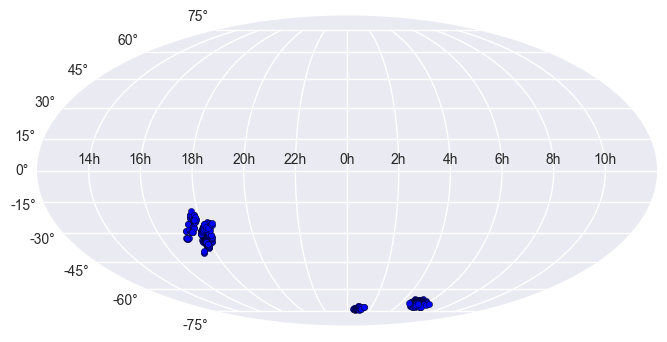

In [65]:
# Dec, RA in hours.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [66]:
# Save map of Type IIs in LMC, SMC, Bulge in pdf.
fig.savefig("TypeIICepheidsMap.pdf")

In [235]:
# Put Period and I-band mean in arrays.
#P = data['P_1']
#I_mean = data['I']
#V_mean = data['V']
#labels = data['Type']

<function matplotlib.pyplot.show>

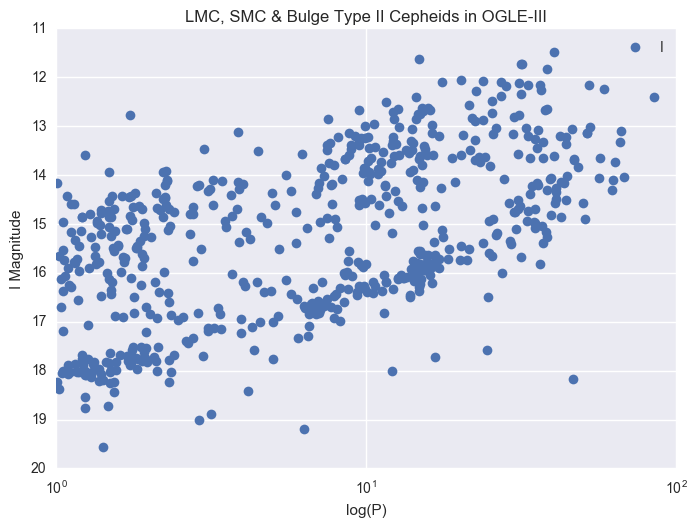

In [237]:
# Plot Period and I_mean.
plt.semilogx(data['P_1'], data['I'], 'o')
plt.title("LMC, SMC & Bulge Type II Cepheids in OGLE-III")
plt.ylabel("I Magnitude")
plt.xlabel("log(P)")
plt.legend(loc='best')
plt.gca().invert_yaxis()
plt.show

In [181]:
# Putting Period and I_mag in same array.
P_I = np.array([data['P_1'], data['I']]).T

In [200]:
# Using 2 PCA Componenets to fit P_I_array.
pca = PCA(n_components=2)
pca.fit(P_I)
print(pca.explained_variance_)
print(pca.components_)

[ 191.27598047    2.05518509]
[[ 0.99826687 -0.05884942]
 [ 0.05884942  0.99826687]]


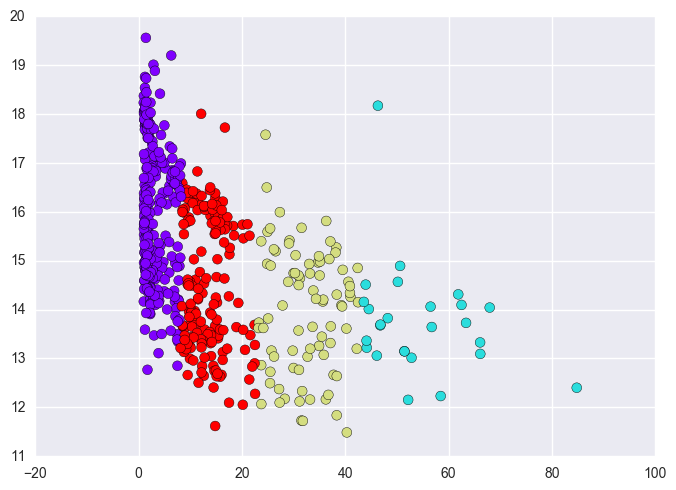

In [199]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(P_I)
y_kmeans = est.predict(P_I)
plt.scatter(P_I[:, 0], P_I[:, 1], c=y_kmeans, s=50, cmap='rainbow');